In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/content/sample_data/california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data = data.drop(columns = "total_rooms", axis = 1)
data.head()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

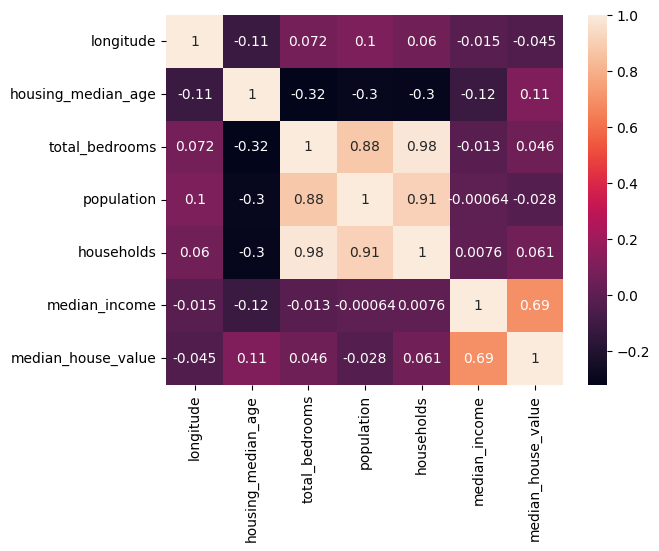

In [ ]:
d = data.drop(columns = 'latitude', axis = 1)
c = d.corr()
sns.heatmap(c, annot=True)

In [ ]:
data = data.drop(columns = "population", axis = 1)

In [ ]:
print(c)

                    longitude  housing_median_age  total_bedrooms  population  \
longitude            1.000000           -0.114250        0.071802    0.101674   
housing_median_age  -0.114250            1.000000       -0.320434   -0.295890   
total_bedrooms       0.071802           -0.320434        1.000000    0.881169   
population           0.101674           -0.295890        0.881169    1.000000   
households           0.059628           -0.302754        0.980920    0.909247   
median_income       -0.015485           -0.115932       -0.013495   -0.000638   
median_house_value  -0.044982            0.106758        0.045783   -0.027850   

                    households  median_income  median_house_value  
longitude             0.059628      -0.015485           -0.044982  
housing_median_age   -0.302754      -0.115932            0.106758  
total_bedrooms        0.980920      -0.013495            0.045783  
population            0.909247      -0.000638           -0.027850  
households 

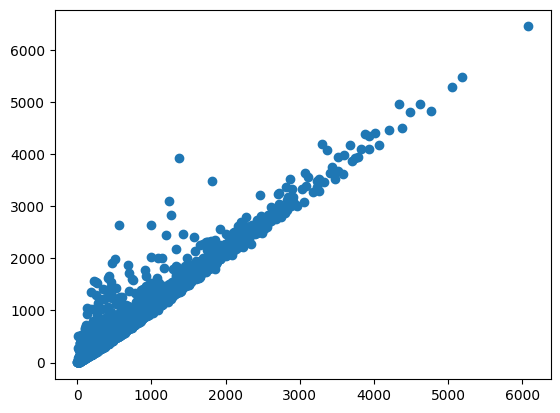

In [ ]:
plt.scatter(data['households'], data['total_bedrooms'])
plt.show()

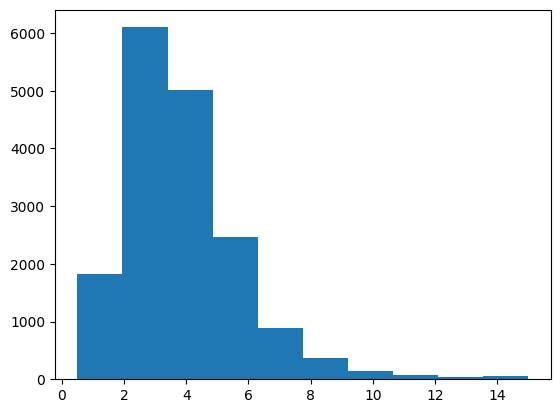

In [ ]:
plt.hist(data['median_income'])
plt.show()

In [ ]:
X = data.drop(columns = 'median_house_value', axis = 1)
Y = data['median_house_value']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle = True)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11900, 6)
(5100, 6)
(11900,)
(5100,)


In [27]:
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge

r = Ridge(alpha = 0.5)
r.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = r.predict(X_test)

# Use appropriate metrics for regression
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))
print("R-squared:", r2_score(Y_test, y_pred))

Mean Squared Error: 56.841764328226795
R-squared: 0.7313786081106597
